In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy

In [2]:
!dir /o-d C:\Users\asopio\Downloads\

 Volume in drive C is Windows
 Volume Serial Number is 8ED9-6CBB

 Directory of C:\Users\asopio\Downloads

26/03/2023  15:35             1,290 Tropical TV _ episode 8.txt
26/03/2023  15:35    <DIR>          ..
26/03/2023  15:35    <DIR>          .
26/03/2023  04:45           723,828 c12908d6-b06b-40c9-abc7-73dac11efa85.log
25/03/2023  22:09           723,386 112033de-9e57-4ca2-9907-63040eb2b087.log
25/03/2023  22:03           612,688 05794828-bc71-4aa1-9028-3d9630a4fb72 (1).log
25/03/2023  21:53           612,688 05794828-bc71-4aa1-9028-3d9630a4fb72.log
25/03/2023  21:48           593,377 390cc2ae-034b-47bb-8068-21db40bc5adc.log
25/03/2023  21:38           655,790 d17bc5a3-8ab2-46e1-b4ee-b8cb91ced609.log
24/03/2023  04:33           461,166 2d592f34-062d-45c2-8784-de655b730ae1 (2).log
24/03/2023  04:30           461,166 2d592f34-062d-45c2-8784-de655b730ae1 (1).log
24/03/2023  04:29           461,166 2d592f34-062d-45c2-8784-de655b730ae1.log
24/03/2023  02:31           517,941 7b0c53ca-51

In [218]:
# df = pd.read_csv("C:/Users/asopio/Downloads/aee9345d-d170-4565-b62c-71186014bf70.csv", delimiter=';')
# df = pd.read_csv("C:/Users/asopio/Downloads/2bf0a961-1d4a-4cb6-a699-6dae2d431f4d.csv", delimiter=';')
# df = pd.read_csv("C:/Users/asopio/Downloads/island-data-bottle-round-1/island-data-bottle-round-1/prices_round_1_day_0.csv", delimiter=';')
df00 = pd.read_csv("island-data-bottle-round-3/prices_round_3_day_0.csv", delimiter=';')
df0 = pd.read_csv("island-data-bottle-round-4/prices_round_4_day_1.csv", delimiter=';')
df1 = pd.read_csv("island-data-bottle-round-4/prices_round_4_day_2.csv", delimiter=';')
df1['timestamp'] += int(1e6)
df2 = pd.read_csv("island-data-bottle-round-4/prices_round_4_day_3.csv", delimiter=';')
df2['timestamp'] += int(2e6)

# df2 = pd.read_csv("C:/Users/asopio/Downloads/97eeede8-ba41-4623-a9b6-461a8f33815f.log", delimiter=';', skiprows=4013)
# df2 = pd.read_csv("C:/Users/asopio/Downloads/90115dc4-5927-4e67-a2e9-14d65be83b66.log", delimiter=';', skiprows=9009)
# df2 = pd.read_csv("C:/Users/asopio/Downloads/90b83442-9d9e-4e79-bba0-a2a505d367e2.log", delimiter=';', skiprows=8648)

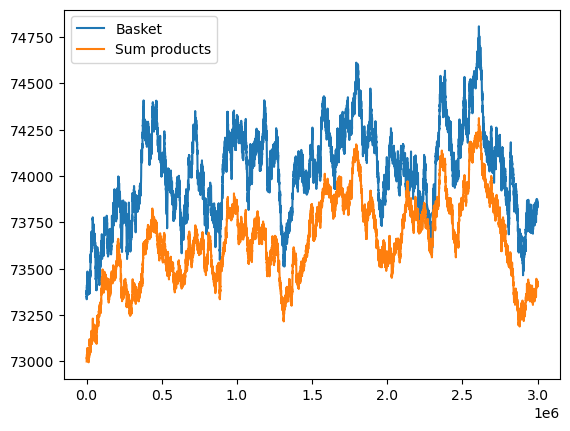

In [4]:
# dfi = df1
dfi = pd.concat([ df0, df1, df2 ])


dp = dfi[dfi['product'] == 'PICNIC_BASKET']['mid_price'].values
du = dfi[dfi['product'] == 'UKULELE']['mid_price'].values
db = dfi[dfi['product'] == 'BAGUETTE']['mid_price'].values
dd = dfi[dfi['product'] == 'DIP']['mid_price'].values

ts = dfi[dfi['product'] == 'PICNIC_BASKET']['timestamp'].values

sum_prods = du + 2 * db + 4 * dd

plt.plot(ts, dp / , label="Basket")
plt.plot(ts, sum_prods, label="Sum products")
plt.legend()

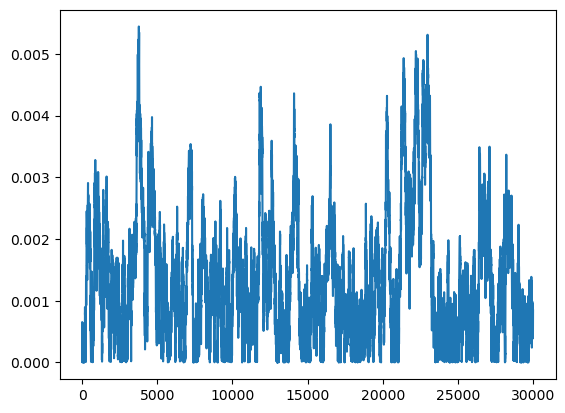

In [163]:
signal = dp / np.mean(dp) - sum_prods / np.mean(sum_prods)
plt.plot( np.abs( signal ) )

(0.0016821539259545787, -1.1558161835030962e-16)

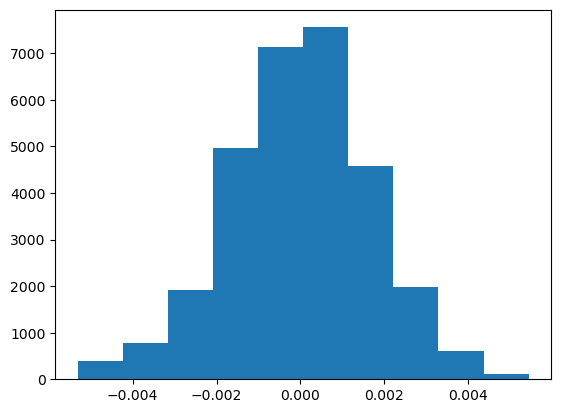

In [339]:
plt.hist(signal) 
np.std(signal), np.mean(signal)

In [340]:
0.001682153 * 2

0.003364306

In [88]:
keys = ['product','bid_volume_1','bid_volume_2','bid_volume_3',
 'bid_price_1','bid_price_2','bid_price_3','mid_price']


dfbids = dfi[ dfi.timestamp == 100 ][keys].fillna(0)
dfbids[ 'tot_vol' ] = dfbids[['bid_volume_1','bid_volume_2','bid_volume_3']].sum(axis=1)
dfbids[ 'tot_vol' ] = dfbids[ 'tot_vol' ].astype(int)


In [89]:
nd = ( dfbids['tot_vol'][ dfbids['product'] == 'DIP' ] // 4 ).values[0]
nb = ( dfbids['tot_vol'][ dfbids['product'] == 'BAGUETTE' ] // 2 ).values[0]
nu = dfbids['tot_vol'][ dfbids['product'] == 'UKULELE' ].values[0]
np = dfbids['tot_vol'][ dfbids['product'] == 'PICNIC_BASKET' ].values[0]

In [95]:
mid = dfbids['mid_price'][ dfbids['product'] == 'DIP' ].values[0] * 4 +\
      dfbids['mid_price'][ dfbids['product'] == 'BAGUETTE' ].values[0] * 2 +\
      dfbids['mid_price'][ dfbids['product'] == 'UKULELE' ].values[0] 

mid

73013.0

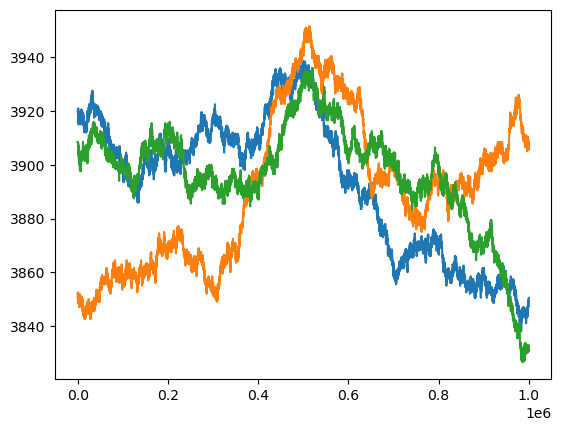

In [17]:
plt.plot( df0[df0['product'] == 'BERRIES']['timestamp'], df0[df0['product'] == 'BERRIES']['mid_price'] )
plt.plot( df1[df1['product'] == 'BERRIES']['timestamp'], df1[df1['product'] == 'BERRIES']['mid_price'] )
plt.plot( df2[df2['product'] == 'BERRIES']['timestamp'], df2[df2['product'] == 'BERRIES']['mid_price'] )

In [13]:
df0

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,DOLPHIN_SIGHTINGS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3047.0,0.0
1,1,0,PINA_COLADAS,15013.0,34.0,15012.0,54.0,NaN,NaN,15016.0,88.0,NaN,NaN,NaN,NaN,15014.5,0.0
2,1,0,DIP,6999.0,237.0,NaN,NaN,NaN,NaN,7001.0,237.0,NaN,NaN,NaN,NaN,7000.0,0.0
3,1,0,BAGUETTE,11999.0,90.0,NaN,NaN,NaN,NaN,12001.0,90.0,NaN,NaN,NaN,NaN,12000.0,0.0
4,1,0,PICNIC_BASKET,73358.0,12.0,73357.0,27.0,NaN,NaN,73372.0,12.0,73373.0,27.0,NaN,NaN,73365.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109995,1,999900,PEARLS,9995.0,20.0,NaN,NaN,NaN,NaN,10005.0,20.0,NaN,NaN,NaN,NaN,10000.0,-224.0
109996,1,999900,COCONUTS,7922.0,178.0,NaN,NaN,NaN,NaN,7925.0,178.0,NaN,NaN,NaN,NaN,7923.5,20068.0
109997,1,999900,BAGUETTE,12254.0,105.0,NaN,NaN,NaN,NaN,12256.0,105.0,NaN,NaN,NaN,NaN,12255.0,-1204240.0
109998,1,999900,PICNIC_BASKET,74306.0,15.0,74305.0,21.0,NaN,NaN,74320.0,15.0,74321.0,21.0,NaN,NaN,74313.0,-698776.0


(30000.0, 32500.0)

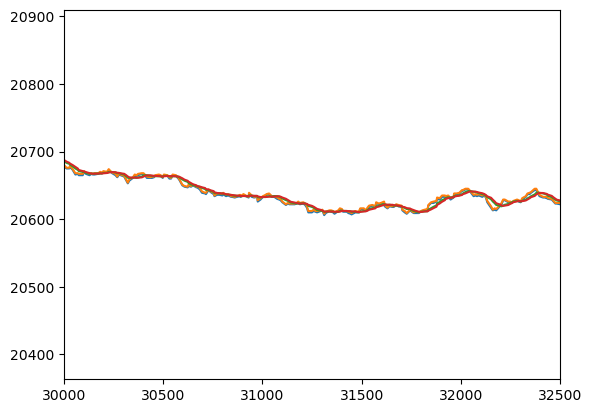

In [337]:
# prod = 'BANANAS'
prod = 'UKULELE'
# prod = 'DIVING_GEAR'
# prod = 'COCONUTS'

dfi = df2

dfb = dfi[dfi['product'] == prod]['mid_price']
dfb_b1 = dfi[dfi['product'] == prod]['bid_price_1']
dfb_a1 = dfi[dfi['product'] == prod]['ask_price_1']

# plt.plot( dfb )
plt.plot( dfb_b1 )
plt.plot( dfb_a1 )

window = 8

mean_plus_deriv = dfb.rolling( window ).apply(lambda x: np.mean(x) + (np.array(x)[-1] - np.array(x)[0])/len(x))
mean_only = dfb.rolling( window ).mean() 

# mean_only = dfb.rolling( window ).apply(lambda x: np.mean(x) + (np.array(x)[-1] - np.array(x)[0])/len(x))

plt.plot( mean_plus_deriv )
plt.plot( mean_only )

# plt.ylim(3860,3920)
# plt.ylim(99600,99900)

plt.xlim( 30000, 32500 )

277.0 260.0


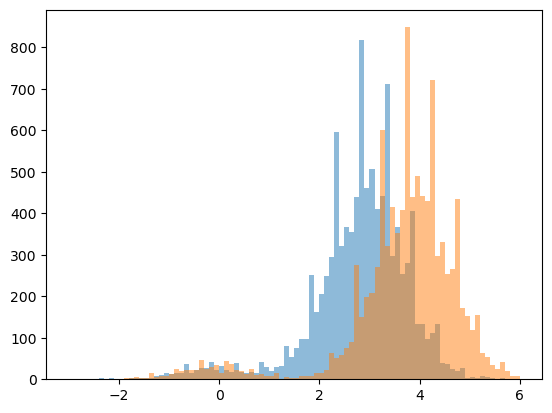

In [329]:
# dfi = df0

# prod = 'BERRIES'
# prod = 'BANANAS'

dfb = dfi[dfi['product'] == prod]['mid_price']
dfb_b1 = dfi[dfi['product'] == prod]['bid_price_1']
dfb_a1 = dfi[dfi['product'] == prod]['ask_price_1']

kw = {
    'range': [-3,6],
    'bins': 90,
    'alpha': 0.5
}

# plt.hist( dfb - dfb_b1, label="bids", **kw )
# plt.hist( dfb_a1 - dfb, label="asks", **kw )

np.mean(dfb) - np.mean( dfb_b1 ), np.mean( dfb_a1 ) - np.mean(dfb)

adj = 0.45

hist_b= plt.hist( dfb.rolling(6).mean() - adj- dfb_b1, **kw )
hist_a = plt.hist( dfb_a1 - dfb.rolling(6).mean() + adj, **kw )

print( np.sum(hist_a[0][ hist_a[1][1:] < 0 ]), np.sum(hist_b[0][ hist_b[1][1:] < 0 ]) )

In [325]:
bin_centres = 0.5*( hist_a[1][1:] + hist_a[1][:-1] )
np.trapz(hist_a[0][bin_centres < 0], bin_centres[bin_centres < 0]), np.trapz(hist_b[0][bin_centres < 0], bin_centres[bin_centres < 0])

(42.15, 13.55)

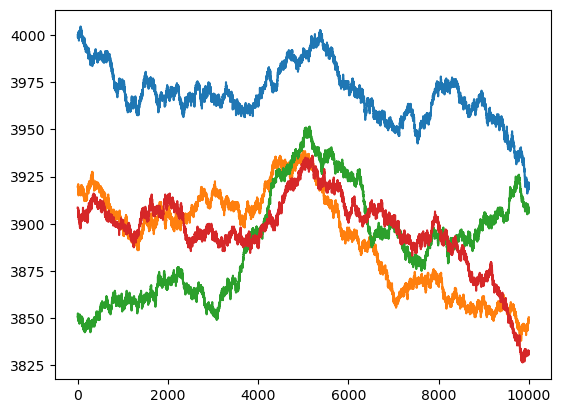

In [326]:
for dfj in [ df00, df0, df1, df2 ]:
    plt.plot( dfj[dfj['product'] == prod]['mid_price'].values )

In [327]:
# prod = 'BANANAS'
# prod = 'BERRIES'

dfb_av1 = dfi[dfi['product'] == prod]['ask_volume_1']
dfb_bv1 = dfi[dfi['product'] == prod]['bid_volume_1']

In [328]:
sale_volumes = dfb_bv1.values[ dfb_b1.values > mean_only ]
buy_volumes = dfb_av1.values[ dfb_a1.values < mean_only ]

tot_sale_volume = np.sum(sale_volumes)
tot_buy_volume = np.sum(buy_volumes)

tot_sale_volume, tot_buy_volume

(1379.0, 3255.0)

In [304]:
avg_sale_price = np.mean( dfb_b1.values[ dfb_b1.values > mean_only ] )
avg_buy_price = np.mean( dfb_a1.values[ dfb_a1.values < mean_only ] )

In [305]:
avg_sale_price, avg_buy_price

(4776.174863387978, 4772.489177489178)

In [306]:
profit = tot_sale_volume * avg_sale_price - tot_buy_volume * avg_buy_price
profit

-1457922.8617557324

In [298]:
num_sales = len(dfb_b1.values[ dfb_b1.values > mean_only ])
num_buys = len(dfb_a1.values[ dfb_a1.values < mean_only ])


num_sales, num_buys

(942, 696)

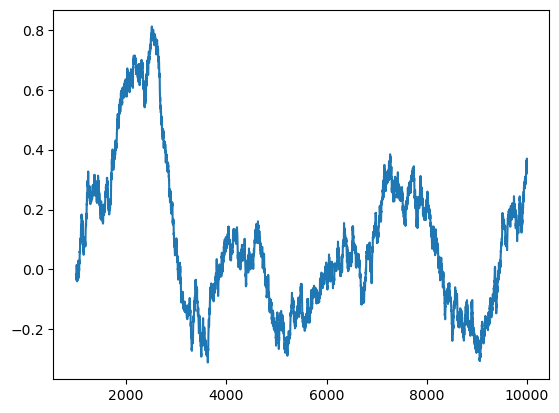

In [263]:
plt.plot( pd.Series(dfb.values[1:] - dfb.values[:-1]).rolling(1000).mean() )

(0.0, 100.0)

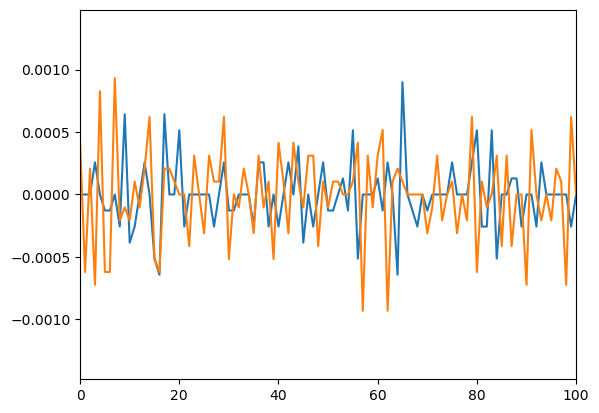

In [149]:
plt.plot( ds_norm.values[1:] - ds_norm.values[:-1] )
plt.plot( dg_norm.values[1:] - dg_norm.values[:-1] )
plt.xlim( 0, 100 )

-0.0008149562524175939


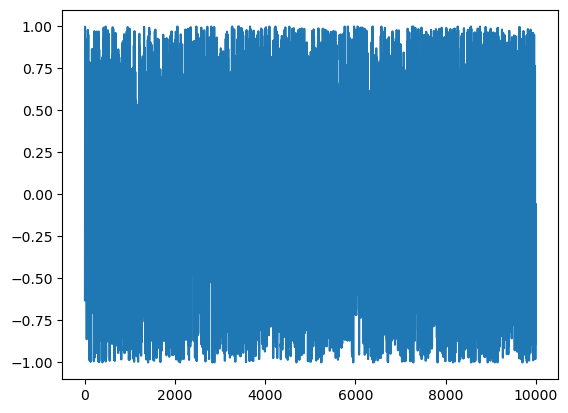

In [157]:
dfc = pd.DataFrame( {"BERRIES": ds_norm.values[1:] - ds_norm.values[:-1], 
                     "BANANAS": dg_norm.values[1:] - dg_norm.values[:-1] } )
dfc.corr()

corr = dfc['BERRIES'].rolling( 4 ).corr( dfc['BANANAS'] )

plt.plot( corr )
# plt.xlim( 0, 100 )

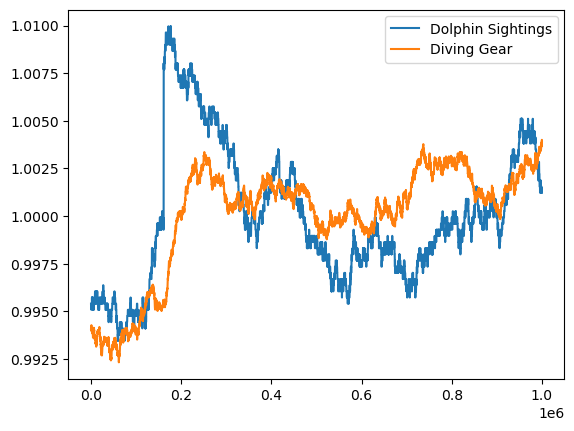

In [291]:
dfi = df2

ds = dfi[dfi['product'] == 'DOLPHIN_SIGHTINGS']['mid_price'].values
dg = dfi[dfi['product'] == 'DIVING_GEAR']['mid_price'].values

ds_norm = ds / np.mean(ds)
dg_norm = dg / np.mean(dg)

plt.plot( dfi[dfi['product'] == 'DIVING_GEAR']['timestamp'], ds_norm, label='Dolphin Sightings' )
plt.plot( dfi[dfi['product'] == 'DIVING_GEAR']['timestamp'], dg_norm, label='Diving Gear' )
# plt.xlim(6e3,8e3)

plt.legend()

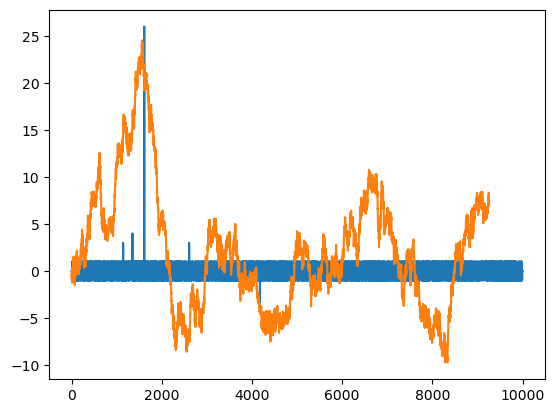

In [292]:
plt.plot( ds[1:] - ds[:-1] )
plt.plot( (dg_norm[750:] - dg_norm[:-750]) * np.mean(ds) )

# plt.xlim( 6e3,7e3 )
# plt.ylim(0,0.001)
# plt.plot( dg_norm.values -1 )

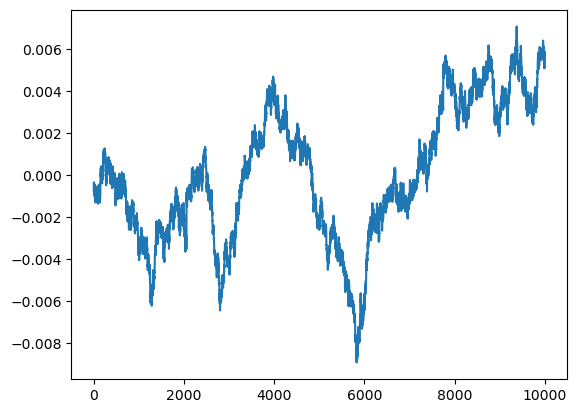

In [5]:
# plt.hist( df0[df0['product'] == 'PINA_COLADAS']['bid_volume_1'], alpha=0.5 )
# plt.hist( df0[ df0['product'] == 'COCONUTS' ]['bid_volume_1'], alpha=0.5 )
# plt.hist( df0[df0['product'] == 'PINA_COLADAS']['ask_volume_1'], alpha=0.5 )
# plt.hist( df0[ df0['product'] == 'COCONUTS' ]['ask_volume_1'], alpha=0.5 )

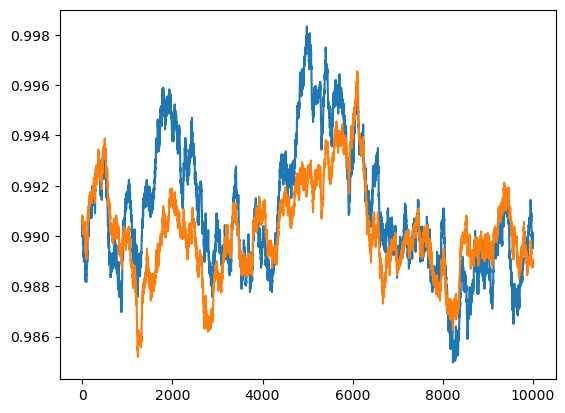

In [6]:
plt.plot( df2[ df2['product'] == 'PINA_COLADAS' ]['mid_price'].values/15000 )
plt.plot( df2[ df2['product'] == 'COCONUTS' ]['mid_price'].values/8000 )

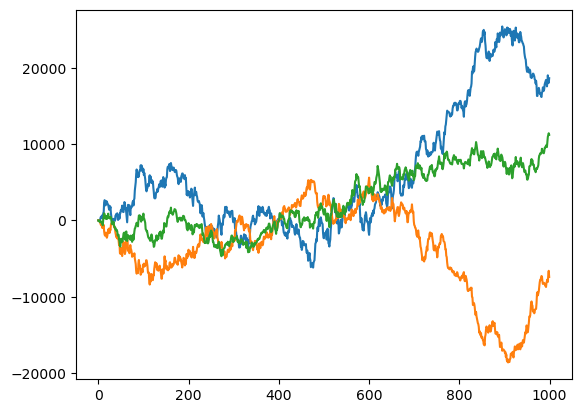

In [196]:
pnl_p = df2[ df2['product'] == 'PINA_COLADAS' ]['profit_and_loss'].values
pnl_c = df2[ df2['product'] == 'COCONUTS' ]['profit_and_loss'].values

plt.plot(pnl_p)
plt.plot(pnl_c)
plt.plot(pnl_p + pnl_c)

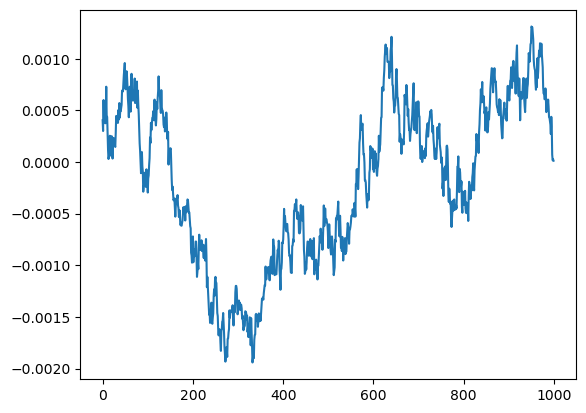

In [148]:
# prod = 'BANANAS'
prod1 = 'PINA_COLADAS'
prod2 = 'COCONUTS'

# plt.plot( df2[ df2['product'] == prod1 ]['mid_price'] / 15000 ) 
# plt.plot( df2[ df2['product'] == prod2 ]['mid_price'] / 8000 )
plt.plot( df2[ df2['product'] == prod1 ]['mid_price'].values / 15000 - df2[ df2['product'] == prod2 ]['mid_price'].values / 8000 )

In [125]:
min(1,2,3,4)

1

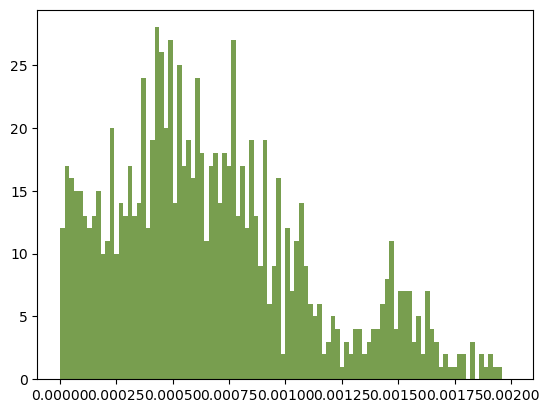

In [200]:
for df in [df0,df1,df2]:

#     pnorm1 = df[ df['product'] == prod1 ]['mid_price'].values / 15000
#     pnorm2 = df[ df['product'] == prod2 ]['mid_price'].values / 8000

    plt.hist( np.abs(pnorm1 - pnorm2), alpha=0.5, range=[0,0.002], bins=100 )

In [51]:
print( np.mean(df0['mid_price']), np.std(df0['mid_price']), df0['mid_price'].values[0], df0['mid_price'].values[-1] )
print( np.mean(df1['mid_price']), np.std(df1['mid_price']), df1['mid_price'].values[0], df1['mid_price'].values[-1] )
print( np.mean(df2['mid_price']), np.std(df2['mid_price']), df2['mid_price'].values[0], df2['mid_price'].values[-1] )

4922.1504 16.392999415604265 4951.5 4895.0
4889.50765 7.621975890640096 4896.0 4873.0
4834.6585 25.74498451640641 4874.0 4823.5


In [110]:
{'pee','poo','ass'}.issubset( set({'poo':1,'pee':2,'ass':3}.keys()) )

True

(2.6313499999996566, 2.631350000000566)

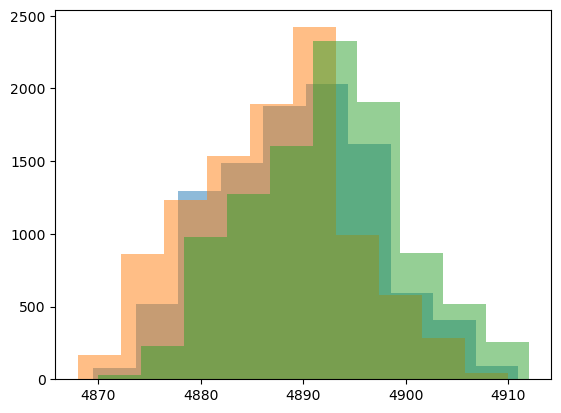

In [75]:
plt.hist(df2['mid_price'], alpha=0.5)
plt.hist(df2['bid_price_1'], alpha=0.5)
plt.hist(df2['ask_price_1'], alpha=0.5)

np.mean(df2['mid_price']) - np.mean(df2['bid_price_1']), np.mean(df2['ask_price_1']) - np.mean(df2['mid_price'])

# scipy.stats.kurtosis(df2['mid_price'])

(4889.50765, 7.621975890640096)

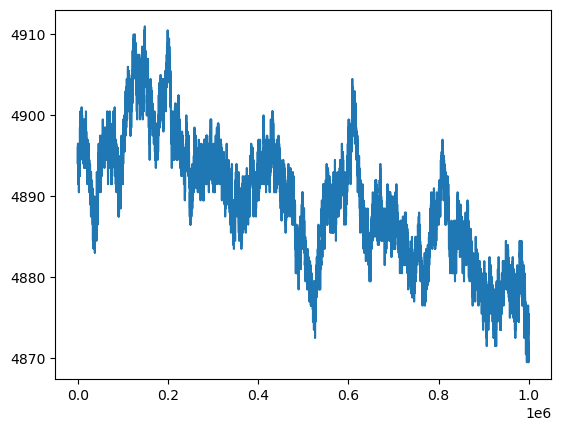

In [38]:
# prod = 'PEARLS'
prod = 'BANANAS'

df_prod = df[ df['product'] == prod ]

plt.plot( df_prod['timestamp'], df_prod['mid_price'] )
# plt.plot( df_prod['timestamp'], df_prod['bid_price_1'] )
# plt.plot( df_prod['timestamp'], df_prod['bid_price_2'] )
# plt.plot( df_prod['timestamp'], df_prod['bid_price_3'] )
np.mean(df_prod['mid_price']), np.std(df_prod['mid_price'])

In [88]:
np.sort([4,5,6,7,3,2,1])[::-1]

array([7, 6, 5, 4, 3, 2, 1])

(9990.0, 10010.0)

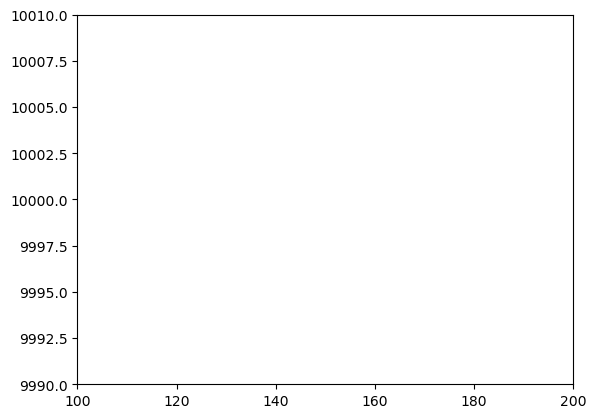

In [39]:
bids = np.array([df_prod['bid_price_1'].values, df_prod['bid_price_2'].values, df_prod['bid_price_3'].values]).T
bids = np.nan_to_num( bids, 0 )

asks = np.array([df_prod['ask_price_1'].values, df_prod['ask_price_2'].values, df_prod['ask_price_3'].values]).T
asks = np.nan_to_num( asks, nan=999999 )


# plt.plot( np.max( bids, axis=1 ) )
# plt.plot( np.min( asks, axis=1 ) )

plt.plot(bids[:,0])
# plt.plot(bids[:,1])
# plt.plot(bids[:,2])

plt.plot(asks[:,0])
# plt.plot(asks[:,1])
# plt.plot(asks[:,2])

# plt.plot(df_prod['mid_price'])

# plt.plot(np.max( bids, axis=1 ))
plt.xlim( 100, 200)
plt.ylim( 9990, 10010 )

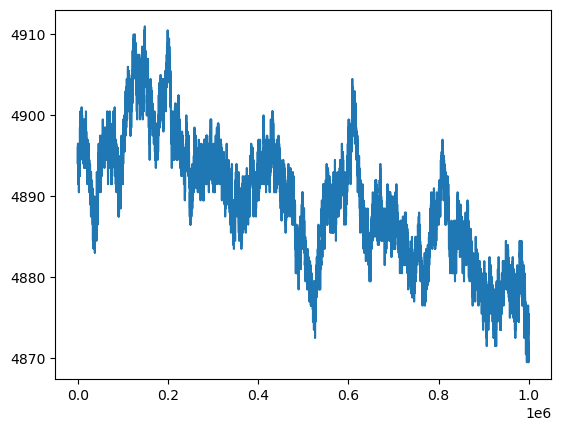

In [40]:
plt.plot( df_prod['timestamp'], df_prod['mid_price'] )

In [41]:
wsum_bids = np.sum([ df_prod[f'bid_price_{ibid}'].fillna(0) * df_prod[f'bid_volume_{ibid}'].fillna(0) for ibid in range(1,4) ], axis=0)
tot_bidvol = np.sum([ df_prod[f'bid_volume_{ibid}'].fillna(0) for ibid in range(1,4) ], axis=0)

wsum_asks = np.sum([ df_prod[f'ask_price_{ibid}'].fillna(0) * df_prod[f'ask_volume_{ibid}'].fillna(0) for ibid in range(1,4) ], axis=0)
tot_askvol = np.sum([ df_prod[f'ask_volume_{ibid}'].fillna(0) for ibid in range(1,4) ], axis=0)


avg_bid = wsum_bids / tot_bidvol
avg_ask = wsum_asks / tot_askvol

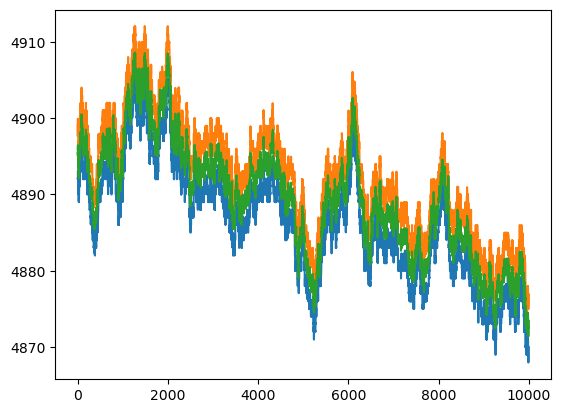

In [42]:
plt.plot(avg_bid)
plt.plot(avg_ask)
plt.plot( (wsum_bids + wsum_asks) / (tot_bidvol + tot_askvol) )

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]),
 array([-5.        , -4.52380952, -4.04761905, -3.57142857, -3.0952381 ,
        -2.61904762, -2.14285714, -1.66666667, -1.19047619, -0.71428571,
        -0.23809524,  0.23809524,  0.71428571,  1.19047619,  1.66666667,
         2.14285714,  2.61904762,  3.0952381 ,  3.57142857,  4.04761905,
         4.52380952,  5.        ]),
 <BarContainer object of 21 artists>)

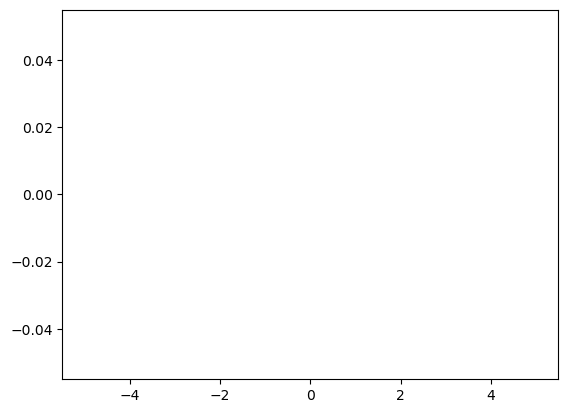

In [43]:
plt.hist( df_prod['mid_price'] - 10000, bins=21, range=[-5,5] )
plt.hist( df_prod['bid_price_1'] - 10000, bins=21, range=[-5,5] )
plt.hist( df_prod['ask_price_1'] - 10000, bins=21, range=[-5,5] )

In [44]:
moving_average = lambda arr, n: np.convolve(arr, np.ones(n), 'same')  * (1.0/n)

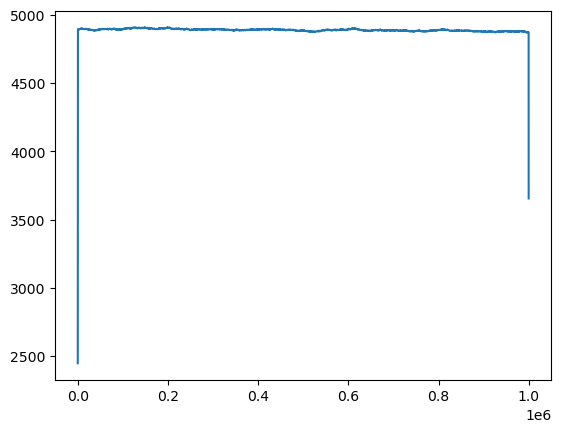

In [46]:
plt.plot( df_prod['timestamp'], moving_average(df_prod['mid_price'],4) )
plt.ylim( 4920, 4960 )

In [47]:
df_prod['mid_price'].values

array([4896. , 4894. , 4895.5, ..., 4875.5, 4872.5, 4873. ])

In [55]:
chg =  df_prod['mid_price'][500:].values - df_prod['mid_price'][:-500].values 
chg_bid_1 =  df_prod['bid_price_1'][1:].values - df_prod['mid_price'][:-1].values 
chg_ask_1 =  df_prod['ask_price_1'][1:].values - df_prod['mid_price'][:-1].values 

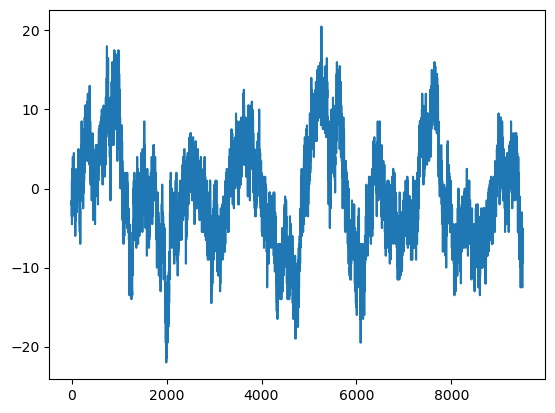

In [56]:
plt.plot( chg )
# plt.plot( chg_bid_1 )
# plt.plot( chg_ask_1 )
# plt.xlim( 0, 100 )

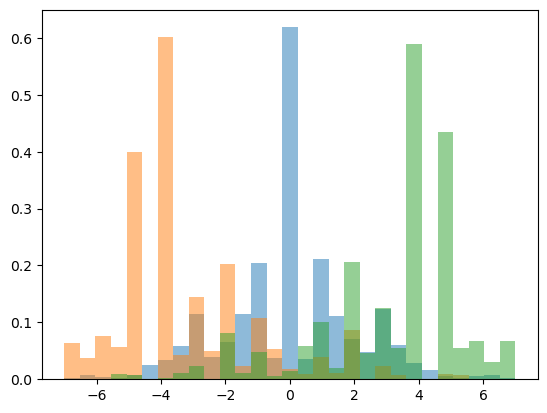

In [83]:
histo = plt.hist( chg, bins=29, range=[-7, 7], alpha=0.5, density=True )
histo = plt.hist( chg_bid_1, bins=29, range=[-7, 7], alpha=0.5, density=True )
histo = plt.hist( chg_ask_1, bins=29, range=[-7, 7], alpha=0.5, density=True )

In [26]:
def fitfunc( x, sigma ):
    mu = 0
#     return scipy.stats.norm.pdf( x, mu, sigma1 ) + scipy.stats.norm.pdf( x, mu, sigma1 )
    return scipy.stats.logistic.pdf( x, mu, sigma )

In [27]:
chg

array([-1.5,  0.5,  0.5, ...,  0.5,  0. , -2.5])

In [28]:
np.linspace(-7,7,29)

array([-7. , -6.5, -6. , -5.5, -5. , -4.5, -4. , -3.5, -3. , -2.5, -2. ,
       -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,
        4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ])

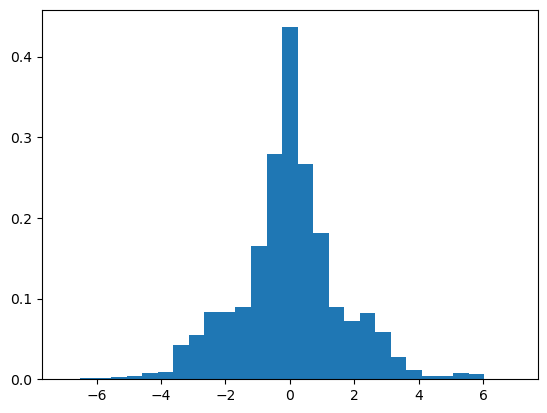

In [29]:
histo = plt.hist( chg, bins=29, range=[-7, 7], density=True )
# plt.plot( np.linspace(-7,7,100) )
# plt.plot( np.linspace(-7,7,100),  )
# plt.plot( np.linspace(-7,7,100), scipy.stats.laplace.pdf(np.linspace(-7,7,100),0,0.5) )
# plt.plot( np.linspace(-7,7,100), scipy.stats.t.pdf(np.linspace(-7,7,100),1) )

In [30]:
bcs = histo[1][1:]-histo[1][:-1]
fitparams, cov = curve_fit( fitfunc, bcs, histo[0], p0=[0.5] )
fitparams

array([3.48324628])

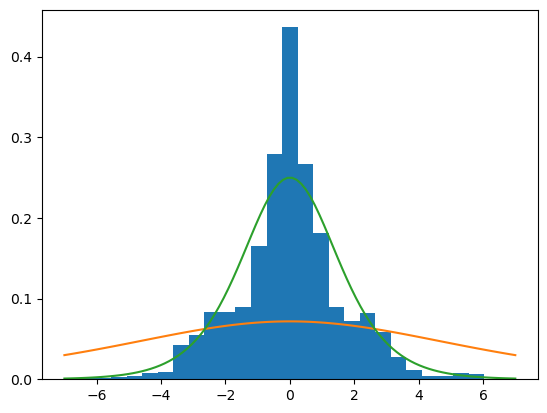

In [31]:
histo = plt.hist( chg, bins=29, range=[-7, 7], density=True )
# plt.plot( np.linspace(-7,7,100), fitfunc( np.linspace(-7,7,100), *fitparams) )
plt.plot( np.linspace(-7,7,100), fitfunc(np.linspace(-7,7,100),*fitparams) )
plt.plot( np.linspace(-7,7,100), fitfunc(np.linspace(-7,7,100),1) )

In [13]:
from itertools import 

In [19]:
mat  = np.array([
    [ 1, 0.5, 1.45, 0.75 ],
    [ 1.95, 1, 3.1, 1.49 ],
    [ 0.67, 0.31, 1, 0.48],
    [ 1.34, 0.64, 1.98, 1],   
])

mat

array([[1.  , 0.5 , 1.45, 0.75],
       [1.95, 1.  , 3.1 , 1.49],
       [0.67, 0.31, 1.  , 0.48],
       [1.34, 0.64, 1.98, 1.  ]])

In [36]:
perm = [ 0, 0, 0, 0 ]
symbs = [ 'p', 'w', 'sn', 'sh' ]

pnls = []

for t1,s1 in enumerate(symbs):
    for t2,s2 in enumerate(symbs):
        for t3,s3 in enumerate(symbs):
            for t4,s4 in enumerate(symbs):
                perm = [s1, s2, s3, s4]
                
                pnl = mat[3, t1] * mat[ t1, t2 ] * mat[ t2, t3 ] * mat[t3, t4] * mat[t4, 3]
                print( perm, pnl )
                pnls.append( (pnl - 1) * 2e6  )

['p', 'p', 'p', 'p'] 1.0050000000000001
['p', 'p', 'p', 'w'] 0.9983000000000001
['p', 'p', 'p', 'sn'] 0.93264
['p', 'p', 'p', 'sh'] 1.0050000000000001
['p', 'p', 'w', 'p'] 0.979875
['p', 'p', 'w', 'w'] 0.9983000000000001
['p', 'p', 'w', 'sn'] 0.9969600000000002
['p', 'p', 'w', 'sh'] 0.9983000000000001
['p', 'p', 'sn', 'p'] 0.9763575000000001
['p', 'p', 'sn', 'w'] 0.8974717000000001
['p', 'p', 'sn', 'sn'] 0.93264
['p', 'p', 'sn', 'sh'] 0.93264
['p', 'p', 'sh', 'p'] 1.0100250000000002
['p', 'p', 'sh', 'w'] 0.9583680000000001
['p', 'p', 'sh', 'sn'] 0.9551520000000001
['p', 'p', 'sh', 'sh'] 1.0050000000000001
['p', 'w', 'p', 'p'] 0.979875
['p', 'w', 'p', 'w'] 0.9733425
['p', 'w', 'p', 'sn'] 0.909324
['p', 'w', 'p', 'sh'] 0.979875
['p', 'w', 'w', 'p'] 0.979875
['p', 'w', 'w', 'w'] 0.9983000000000001
['p', 'w', 'w', 'sn'] 0.9969600000000002
['p', 'w', 'w', 'sh'] 0.9983000000000001
['p', 'w', 'sn', 'p'] 1.0436925000000001
['p', 'w', 'sn', 'w'] 0.9593663000000002
['p', 'w', 'sn', 'sn'] 0.99696

87385.00000000026

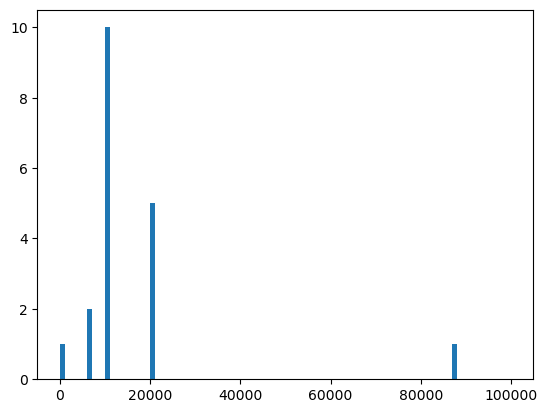

In [37]:
plt.hist( pnls, bins=100, range=[0,1e5] )
np.max(pnls)

In [150]:
9000/4, 11000/4

(2250.0, 2750.0)

(array([  4.,   9.,  11.,  14.,  24.,  22.,  39.,  52.,  70.,  98., 101.,
        159., 187., 243., 273., 325., 404., 444., 491., 523., 528., 580.,
        585., 583., 575., 543., 498., 492., 383., 337., 289., 245., 213.,
        175., 135., 100.,  67.,  66.,  45.,  24.,  13.,  14.,   5.,   5.,
          2.,   2.,   1.,   0.,   1.,   1.]),
 array([ 9018.50608008,  9061.87354836,  9105.24101665,  9148.60848493,
         9191.97595321,  9235.3434215 ,  9278.71088978,  9322.07835807,
         9365.44582635,  9408.81329463,  9452.18076292,  9495.5482312 ,
         9538.91569949,  9582.28316777,  9625.65063606,  9669.01810434,
         9712.38557262,  9755.75304091,  9799.12050919,  9842.48797748,
         9885.85544576,  9929.22291404,  9972.59038233, 10015.95785061,
        10059.3253189 , 10102.69278718, 10146.06025546, 10189.42772375,
        10232.79519203, 10276.16266032, 10319.5301286 , 10362.89759689,
        10406.26506517, 10449.63253345, 10493.00000174, 10536.36747002,
        10

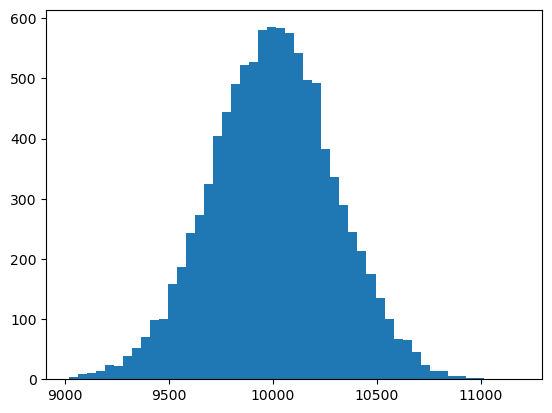

In [190]:
bids = np.random.normal( 10e3, 300, 10000 )
# bids = np.random.normal( 9700, 500, 10000 )

plt.hist(bids, bins=50)

In [191]:
np.percentile( bids, 25 ), np.percentile( bids, 37 )

(9800.927442794233, 9903.184516860056)

In [345]:
!dir island-data-bottle-round-4

 Volume in drive C is Windows
 Volume Serial Number is 8ED9-6CBB

 Directory of C:\Users\asopio\Documents\imc-prosperity-challenge\island-data-bottle-round-4

26/03/2023  15:08    <DIR>          .
26/03/2023  15:08    <DIR>          ..
26/03/2023  15:08         7,277,725 prices_round_4_day_1.csv
26/03/2023  15:08         7,284,307 prices_round_4_day_2.csv
26/03/2023  15:08         7,299,484 prices_round_4_day_3.csv
26/03/2023  15:08           403,812 trades_round_4_day_1_nn.csv
26/03/2023  15:08           390,855 trades_round_4_day_2_nn.csv
26/03/2023  15:08           394,778 trades_round_4_day_3_nn.csv
               6 File(s)     23,050,961 bytes
               2 Dir(s)  17,929,170,944 bytes free


In [508]:
#Trades info
trdf0 = pd.read_csv("island-data-bottle-round-5/trades_round_4_day_1_wn.csv", delimiter=';')
trdf1 = pd.read_csv("island-data-bottle-round-5/trades_round_4_day_2_wn.csv", delimiter=';')
trdf1['timestamp'] += 1e6
trdf2 = pd.read_csv("island-data-bottle-round-5/trades_round_4_day_3_wn.csv", delimiter=';')
trdf2['timestamp'] += 2e6


pdf0 = pd.read_csv("island-data-bottle-round-4/prices_round_4_day_1.csv", delimiter=';')
pdf1 = pd.read_csv("island-data-bottle-round-4/prices_round_4_day_2.csv", delimiter=';')
pdf1['timestamp'] += 1e6
pdf2 = pd.read_csv("island-data-bottle-round-4/prices_round_4_day_3.csv", delimiter=';')
pdf2['timestamp'] += 2e6

trdf = pd.concat( [ trdf0, trdf1, trdf2 ] )
pdf = pd.concat( [ pdf0, pdf1, pdf2 ] )

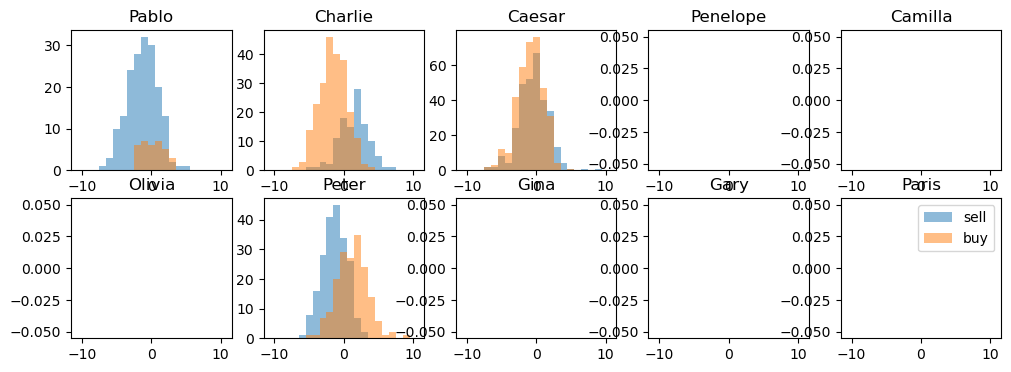

In [776]:
fig, ax = plt.subplots(2,5, figsize=(12,4))

# tn = 'Charlie'
# product = 'PEARLS'
# product = 'UKULELE'
# product = 'DIP'
# product = 'BAGUETTE'
# product = 'BERRIES'
# product = 'BANANAS'
# product = 'PICNIC_BASKET'
# product = 'DIVING_GEAR'
# product = 'COCONUTS'
product = 'PINA_COLADAS'



# mid_price = 10000
# delta = 5
# mid_price = 5000
delta = 10

mid_prices = pdf[ pdf['product'] == product ][['timestamp', 'mid_price']]
mid_prices = mid_prices.set_index('timestamp')['mid_price'].rolling(4).mean()
# mid_prices = mid_prices.set_index('timestamp')['mid_price']

for i, tn in enumerate(trader_names):
    
    ix = i % 5
    iy = i // 5
    
    sales = trdf[ (trdf['seller']==tn) & (trdf['symbol']==product) ]
    buys = trdf[ (trdf['buyer']==tn) & (trdf['symbol']==product) ]
    
    ds = (sales.set_index('timestamp')['price'] - mid_prices).dropna()
    db = (buys.set_index('timestamp')['price'] - mid_prices).dropna()
    
    kw = {        
        'range':[- delta - 0.5 , delta + 0.5 ],        
        'bins': 2 * delta + 1,
        'alpha':0.5,
    }
    
    ax[iy,ix].hist( ds, **kw, label='sell' )
    ax[iy,ix].hist( db, **kw, label='buy' )
    ax[iy,ix].set_title(tn)
    
ax[-1,-1].legend()

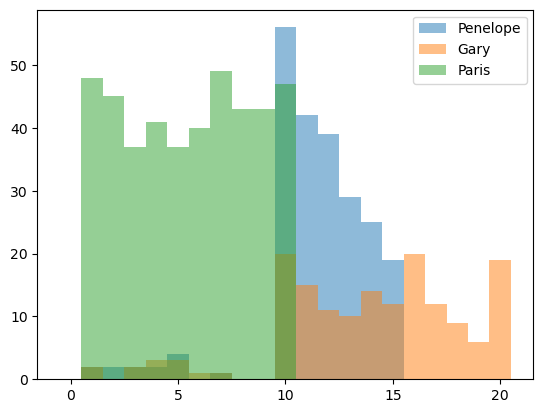

In [750]:
# trader_name = 'Penelope'
product = 'BERRIES'
# product = 'PEARLS'
# product = 'COCONUTS'
# product = 'BANANAS'
# product = 'DIVING_GEAR'
# product = 'PICNIC_BASKET'

kws={
    'range':[-0.5,20.5], 
    'bins': 21,    
    'alpha': 0.5
}

mid_prices = pdf[ pdf['product'] == product ][['timestamp', 'mid_price']]
mid_prices = mid_prices.set_index('timestamp')['mid_price'].rolling(100, center=True).mean()
# mid_prices = mid_prices.set_index('timestamp')['mid_price']

# 'Pablo', 
for tn in [ 'Penelope', 'Gary', 'Paris' ]:
    
    sales = trdf[ (trdf['seller']==tn) & (trdf['symbol']==product) ]
    buys = trdf[ (trdf['buyer']==tn) & (trdf['symbol']==product) ]
        
    ds = (sales.set_index('timestamp')['price'] - mid_prices).dropna()
    db = (buys.set_index('timestamp')['price'] - mid_prices).dropna()
    
    qb = trdf[ (trdf['buyer']==tn) & (trdf['symbol']==product) ]['quantity']
    qs = trdf[ (trdf['seller']==tn) & (trdf['symbol']==product) ]['quantity']
    
#     print( len(qs), len(ds) )
    
    plt.hist( qs, **kws, label=tn )
#     plt.scatter( qs, ds, label=tn )
#     plt.scatter( qs, ds, label=tn )
    
    
plt.legend()

(array([14., 12., 12.,  0.,  7., 12.,  0., 15., 14., 14.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

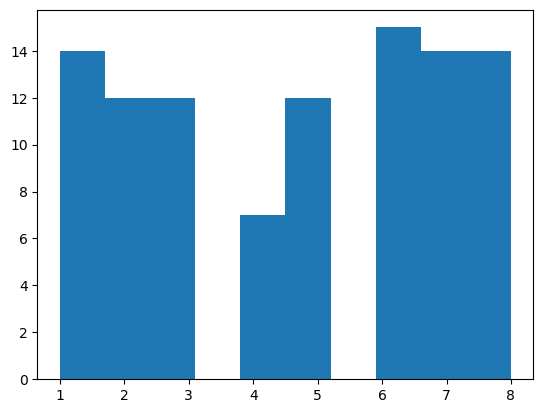

In [774]:
intrange = lambda m,mr: np.random.randint(m-mr,m+mr) if mr>0 else m

plt.hist( [ intrange(5,4) for i in range(100) ]  )

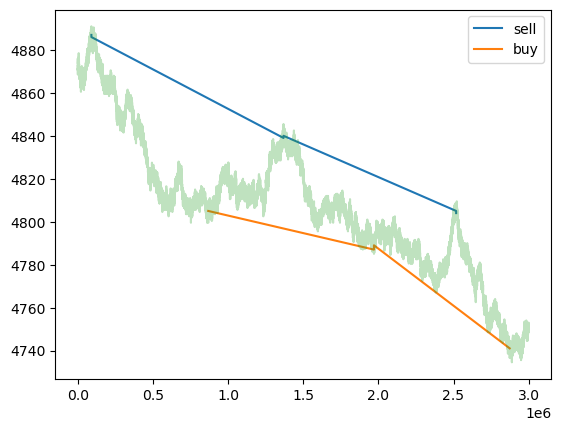

In [691]:
# trader_name = 'Pablo'
# trader_name = 'Charlie'
# trader_name = 'Penelope'
# trader_name = 'Camilla'
trader_name = 'Olivia'
# trader_name = 'Gina'
# trader_name = 'Peter'
# trader_name = 'Caesar'
# trader_name = 'Gary'
# trader_name = 'Paris'


# product = 'PINA_COLADAS'
# product = 'COCONUTS'
# product = 'PEARLS'
# product = 'UKULELE'
product = 'BANANAS'
# product = 'BERRIES'
# product = 'PICNIC_BASKET'


sales = trdf[ (trdf['seller']==trader_name) & (trdf['symbol']==product) ] 
buys = trdf[ (trdf['buyer']==trader_name) & (trdf['symbol']==product) ] 

mid_prices = pdf[ pdf['product'] == product ][['timestamp', 'mid_price']]

plt.plot( sales['timestamp'], sales['price'], label='sell' )
plt.plot( buys['timestamp'], buys['price'], label='buy' )
plt.plot( mid_prices['timestamp'], mid_prices['mid_price'], alpha=0.3 )

plt.legend()

# plt.xlim(0, 100000)
